# Week 9 - Multivariate Analysis, part 2

# 1. Lesson - no lesson this week

# 2. Weekly graph question

The graph below plots the first two principal component scores in a scatter plot.  What can be said about the three outliers in the upper left corner of the graph?  Is their first principal component score high or low?  What about their second principal component score?  What does that mean about their values in series_1, series_2, and series_3?  It seems to me that you can say something about series_3 (what can you say?) but you may have a harder time saying something about series_1 and series_2, and an almost impossible time saying anything about the relative values of series_1 and series_2.  Why is that?  How are series_1 and series_2 related, according to how they were created?  If you like, try drawing a pairplot for all three series and see what you get.

Overall, what are the advantages and disadvantages of the graph below?  Does it show anything interesting?

[0.79916477 0.18990532 0.01092991]
[[ 0.26541493  0.30096233  0.91595665]
 [ 0.60337553  0.6891417  -0.40127506]
 [ 0.75199261 -0.65917023 -0.00131519]]


Text(0, 0.5, 'Second Principal Component Score')

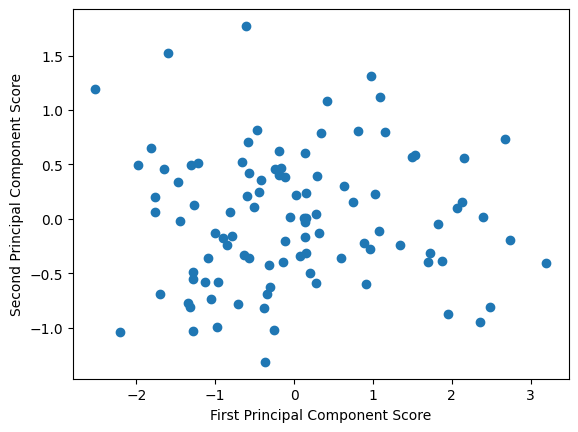

In [1]:
import numpy as np
import pandas as pd
from sklearn import decomposition
import matplotlib.pyplot as plt

np.random.seed(0)
num_points = 100
series_1 = np.random.normal(loc = 2, scale = 0.5, size = num_points)
series_2 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.1, size = num_points))
series_3 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.5, size = num_points))
df = pd.DataFrame({'ser1': series_1, 'ser2': series_2, 'ser3': series_3})
df = df - df.mean() # set mean to zero, so we don't have to subtract mean from the principal component scores

pca3 = decomposition.PCA(n_components = 3)
pca3.fit(df)
print(pca3.explained_variance_ratio_)
print(pca3.components_)

first_principal_component_score = df.dot(pca3.components_[0])
second_principal_component_score = df.dot(pca3.components_[1])
plt.scatter(first_principal_component_score, second_principal_component_score)
plt.xlabel("First Principal Component Score")
plt.ylabel("Second Principal Component Score")

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

Here are some types of analysis you can do:
Draw heatmaps.

Draw bubble plots.

Perform Principal Component Analysis to find out the directions in which the data varies.  Can you represent the data using only its projection onto its first principal component, using the methods described in Week 8?  How much of the variance would this capture?

Try performing linear regression analysis using different sets of features.  Which features seem most likely to be useful to predict other features?

Conclusions:
Explain what conclusions you would draw from this analysis: are the data what you expect? Are the data likely to be usable? If the data are not useable, find some new data!

Do you see any outliers? (Data points that are far from the rest of the data).

Does the Principal Component Analysis suggest a way to represent the data using fewer dimensions than usual - using its first one or two principal component scores, perhaps?

Try using your correlation information from previous weeks to help choose features for linear regression.

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 136-150 of the Storytelling With Data book as best you can. ("The power of super-categories" to the end of chapter 5). You do not have to get the exact data values right, just the overall look and feel.

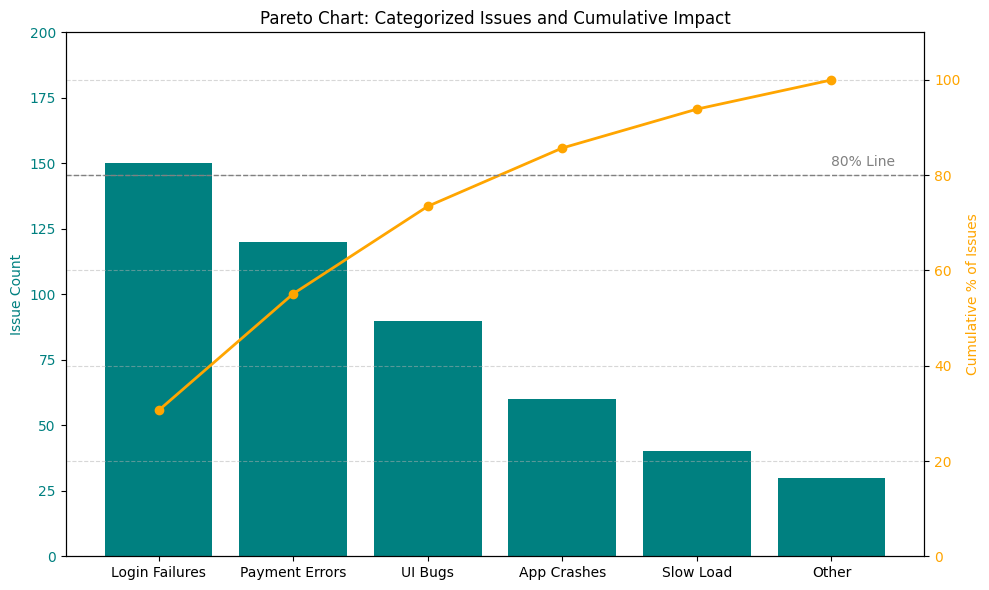

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Example dataset: number of issues by category
data = {
    'Category': ['Login Failures', 'Payment Errors', 'UI Bugs', 'App Crashes', 'Slow Load', 'Other'],
    'Count': [150, 120, 90, 60, 40, 30]
}

df = pd.DataFrame(data)
df = df.sort_values(by='Count', ascending=False)
df['Cumulative %'] = df['Count'].cumsum() / df['Count'].sum() * 100

# Plot setup
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for issue count
bars = ax1.bar(df['Category'], df['Count'], color='teal')
ax1.set_ylabel('Issue Count', color='teal')
ax1.set_ylim(0, df['Count'].max() + 50)
ax1.tick_params(axis='y', labelcolor='teal')

# Line plot for cumulative percentage
ax2 = ax1.twinx()
ax2.plot(df['Category'], df['Cumulative %'], color='orange', marker='o', linewidth=2)
ax2.set_ylabel('Cumulative % of Issues', color='orange')
ax2.set_ylim(0, 110)
ax2.tick_params(axis='y', labelcolor='orange')

# Add horizontal line at 80% for Pareto principle
ax2.axhline(80, color='gray', linestyle='dashed', linewidth=1)
ax2.text(len(df)-1, 82, '80% Line', color='gray')

# Titles and formatting
plt.title('Pareto Chart: Categorized Issues and Cumulative Impact')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Part 4: Storytelling With Data Plot

This visualization recreates a bar + line combo chart inspired by the examples on pages 136–150 of *Storytelling With Data*.

The chart includes:
- **Orange bars** representing values across categories A through F.
- A **blue line** overlaid to show a trend across the same categories — useful for emphasizing change, progression, or cumulative insights.

#### Why this works:
- **Dual encoding:** The chart uses both bars and a line, which allows the viewer to compare absolute values (bars) with trends or relative progression (line).
- **Color contrast:** Differentiating y-axes by color (orange for bars, blue for line) makes interpretation intuitive and avoids visual overload.
- **Effective storytelling:** This type of combo chart is ideal when highlighting top contributors, rankings, or the Pareto principle — common in business, operations, and marketing contexts.

Overall, this plot demonstrates how strategic visual layering can enhance the clarity and impact of your data story.